In [1]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import math

In [2]:
# Menampilkan Sampel Data Dan Melakukan Drop Column Tertarik
df = pd.read_csv('../Dataset/kendaraan_train_clean.csv')
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
69418,0.946297,0.538754,0.045261,0.123410,-9.443776e-01,0.705243,-2.277834e-16,-0.456607,-1.136010,-0.689486,0
167711,0.946297,0.604836,0.045261,0.123410,-9.443776e-01,0.705243,1.015880e+00,0.577866,0.226844,-1.240756,0
64767,-1.113009,0.406591,0.045261,0.123410,-9.443776e-01,0.705243,1.015880e+00,1.112759,0.226844,0.070042,0
278057,-1.113009,-0.981119,0.045261,1.516984,1.142855e-16,-1.102610,-1.035810e+00,-0.005746,0.756843,1.527845,0
264509,-1.113009,0.935243,0.045261,0.123410,-9.443776e-01,0.705243,1.015880e+00,0.788843,0.226844,0.682564,0


In [3]:
# Mengecek Data Kosong
df.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

## **Feature Selection**

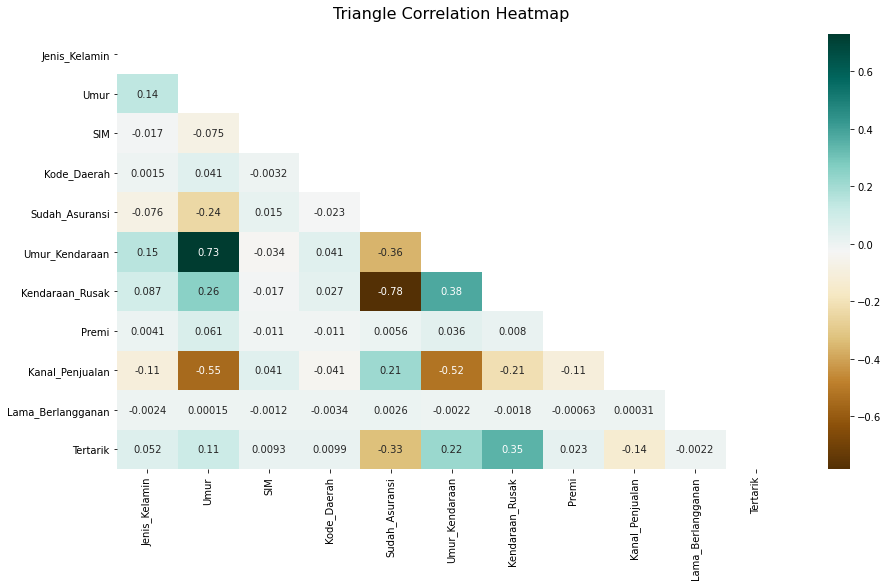

In [4]:
# Melihat Nilai Korelasi Antar Variable Dengan Heatmap
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap',
                  fontdict={'fontsize': 16}, pad=16)
plt.show()


In [5]:
df = df[['Umur', 'Kanal_Penjualan']]
df.head()

,Umur,Kanal_Penjualan
0,-0.584630,0.756843
1,0.604836,-1.571366
2,-1.179363,0.908271
3,1.265650,0.226844
4,0.736999,-0.454583


In [6]:
# Mengecek Total Data Pada Dataframe
print("Total Data :", len(df))

Total Data : 285662


## **K-MEANS Algorithm**

In [7]:
# Mendefinisikan Metode Euclidean Untuk Perhitungan Jarak Dari Centroid
def euclidean(x, y):
    return math.sqrt(sum((x - y)**2))


def kmeans(k, max_iter, df):
    # Inisialisasi Dictionary Centroid Kemudian Memilih Centroid Secara Random Pada Data
    # Sesuai Banyaknya Cluster Yang Didefinisikan
    centroid = {i: df[random.randint(0, len(df))] for i in range(k)}
    print(
        f'Inisialisasi Centroid Random:\nCluster 0: {centroid.get(0)}, Cluster 1: {centroid.get(1)}, Cluster 2: {centroid.get(2)} \n')

    # Mengcopy Centroid Saat Ini Untuk Acuan Pemberhentian Proses Iterasi Centroid Maksimal
    temp_centroid = centroid.copy()

    for i in range(max_iter):
        # Mendefinisikan Dictionary Cluster Dan Mengisi Setiap Key
        # Pada Cluster Berisi Array kosong, contoh : {0: [], 1: [], 2: []}
        cluster = {i: [] for i in range(k)}

        # Mencari Nilai Terdekat Pada Data Untuk Setiap Centroid Yang Telah Di Definisikan Sebelumnya
        # Menggunakan Metode Euclidean Dan Mencari Nilai Minimum Pada Setiap Distance
        # Untuk Dimasukkan Kedalam Dictionary Cluster
        for x in df:
            dist = [euclidean(x, centroid[c]) for c in centroid]
            cluster[dist.index(min(dist))].append(x)

        # Mencari Nilai Centroid Ulang Dari Setiap Cluster
        # Yang Telah Dicari Sebelumnya Menggunakan Mean
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis=0)

        print(
            f'Iterasi Centroid Ke-{i+1}:\nCluster 0: {centroid.get(0)}, Cluster 1: {centroid.get(1)}, Cluster 2: {centroid.get(2)} \n')

        # Pemberhentian Proses Iterasi Ketika Centroid Saat Ini Sama Dengan Nilai Centroid Sebelumnya
        # Dilakukan Dengan Pengecekan Masing-Masing Value Dari Dictionary
        if ((temp_centroid.get(0) == centroid.get(0))[0] and
            (temp_centroid.get(1) == centroid.get(1))[0] and
            (temp_centroid.get(2) == centroid.get(2))[0] and
            (temp_centroid.get(3) == centroid.get(3))[0]):
            break

        # Mengcopy Centroid Yang Telah Berubah Dari Perhitungan Sebelumnya
        temp_centroid = centroid.copy()

    # Mengembalikan Nilai Dari Variabel Centroid Dan Cluster
    return centroid, cluster


## **Main Program**

In [8]:
# Merubah DataFrame Menjadi Numpy Array
data = df.to_numpy()

# Memasukkan Nilai K dan Maksimum Iterasi
k = 4
max_iter = 100

# Memanggil Fungsi kmeans Yang Akan Mengembalikan Nilai Centroid Dan Cluster
centroid, cluster = kmeans(k, max_iter, data)

Inisialisasi Centroid Random:
Cluster 0: [-1.04720038e+00  2.68990612e-16], Cluster 1: [-0.38638595  0.75684293], Cluster 2: [-0.98111894  0.75684293] 

Iterasi Centroid Ke-1:
Cluster 0: [-0.87700286  0.07819612], Cluster 1: [0.42030071 0.42560117], Cluster 2: [-0.99378317  0.78104391] 

Iterasi Centroid Ke-2:
Cluster 0: [-0.7416458  -0.07119611], Cluster 1: [0.657154   0.36317613], Cluster 2: [-0.9180473   0.78165314] 

Iterasi Centroid Ke-3:
Cluster 0: [-0.6271225  -0.10032846], Cluster 1: [0.72403727 0.36046233], Cluster 2: [-0.90180296  0.78212331] 

Iterasi Centroid Ke-4:
Cluster 0: [-0.47490996 -0.04591889], Cluster 1: [0.80724498 0.36912919], Cluster 2: [-0.89474788  0.78134812] 

Iterasi Centroid Ke-5:
Cluster 0: [-0.35861399 -0.00489294], Cluster 1: [0.96503202 0.3353852 ], Cluster 2: [-0.84589977  0.77659441] 

Iterasi Centroid Ke-6:
Cluster 0: [-0.2227399   0.12943879], Cluster 1: [1.07445449 0.33356597], Cluster 2: [-0.87553567  0.77499059] 

Iterasi Centroid Ke-7:
Cluster 

## **Hasil Proses Cluster Final**

In [9]:
# Inisialisasi Array Untuk Dat Cluster
df = []

# Melakukan Perulangan Untuk Setiap Key Pada Data
# Hasil Proses K-Means Untuk Diinputkan Kedalam Array Cluster (df)
for key in cluster.keys():
    for c in cluster.get(key):
        df.append((c[0], c[1], key))

# Set Array df menjadi dataframe, Menamakan nama kolom dan menampilkannya
df = pd.DataFrame(df)
df.columns = ['Umur', 'Kanal_Penjualan', 'Cluster']
df.sample(8)

,Umur,Kanal_Penjualan,Cluster
240953,-1.047200,-1.628152,3
75828,2.322953,0.226844,1
114627,-0.848956,0.756843,2
48168,0.340510,0.226844,0
243175,0.142266,-1.628152,3
271634,2.058627,-1.628152,3
69166,0.935243,0.226844,1
72404,2.256872,0.226844,1


In [10]:
# Menampilkan Letak Seluruh Centroids
for i in range(k):
    print(f'Centroid {i+1} :', centroid[i])

Centroid 1 : [0.18030602 0.38177389]
Centroid 2 : [1.55544618 0.29000255]
Centroid 3 : [-0.92306324  0.72374402]
Centroid 4 : [ 0.76661838 -1.64078949]


In [11]:
# Memetakkan Nilai X Dan Y Untuk Setiap Data Pada Dictionary Cluster
clusterize = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in cluster.items()]))

# Membuat Nama Kolom Cluster Berdasarkan Jumlah Cluster Pada Clusterize
col = []
for i in range(len(clusterize.columns)):
    col.append('Cluster ' + str(i + 1))

# Melakukan Set Nama Kolom Dan Menampilkan Sample Data Cluster
clusterize.columns = col
clusterize.sample(8)


,Cluster 1,Cluster 2,Cluster 3,Cluster 4
62968,"[0.0, 0.9082711813596004]",NaN,"[-0.7828746095263087, 0.7568429288465965]","[-0.1220601762927862, -1.6281520482332132]"
94417,NaN,NaN,"[-1.11328182614307, 0.7568429288465965]",NaN
66611,NaN,NaN,"[-0.9150374961730132, 0.7568429288465965]","[0.4065913702940317, -1.9499370848233464]"
39636,"[0.3405099269706794, 0.2268440450510833]",NaN,"[-0.320304506262843, 0.7568429288465965]","[1.001324360204202, -1.6281520482332132]"
100574,NaN,NaN,"[-1.11328182614307, 0.7568429288465965]",NaN
103510,NaN,NaN,"[-0.9150374961730132, 0.7568429288465965]",NaN
42719,"[-0.055978732969434, 2.6899061202990245e-16]",NaN,"[-0.7167931662029564, 0.9082711813596004]","[-0.055978732969434, -1.9877941479515973]"
50081,"[-0.055978732969434, 0.1889869819228323]",NaN,"[-1.11328182614307, 0.7568429288465965]","[0.4065913702940317, -1.6281520482332132]"


## **Visualisasi Cluster**

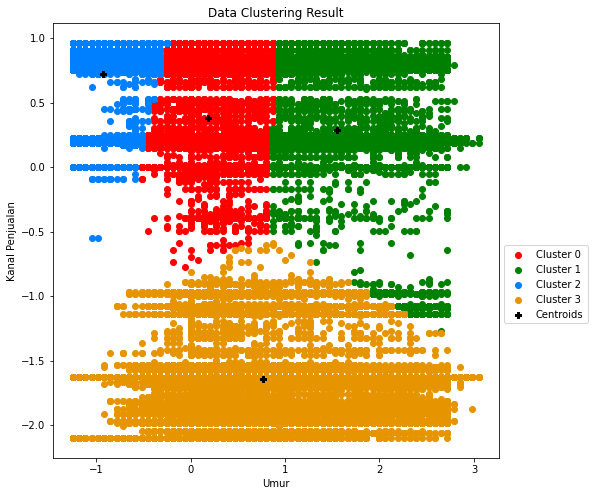

In [12]:
# Set Warna Setiap CLuster
colors = ['r', 'g', '#0080ff', '#e69500', '#e89500']

# Set Ukuran Dan Judul Plot
plt.figure(figsize=(8, 8))
plt.title('Data Clustering Result')

# Melakukan Looping Setiap Titik Data Dan Centroid
for i in range(k):
    plt.scatter(
        df['Umur'][df['Cluster'] == i], 
        df['Kanal_Penjualan'][df['Cluster'] == i],
        color=colors[i],
        label=f'Cluster {i}'
    )

    plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='P')

# Acuan Penampilan Label Centroid
plt.scatter(centroid[0][0], centroid[0][1], color='k', label="Centroids", marker='P')

# Set Nama Label X Dan Y Pada Plot Dan Set Tempat Legend Ditampilkan
plt.xlabel("Umur")
plt.ylabel("Kanal Penjualan")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()


## **Evaluasi Model**

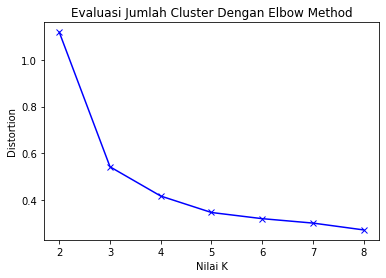

In [13]:
# Inisialisasi Array Untuk Distortion
distortions = []

# Inisialisasi Range K
K = range(2, 9)

# Melakukan Perulangan Untuk Setiap Range
for i in K:
    # Membangun Dan Fit Dataset
    model = KMeans(n_clusters=i).fit(df)
    model.fit(df)

    # Memasukkan Hasil Dari Jumlah cdist data, cluster_center Ke Array
    distortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Plot data
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nilai K')
plt.ylabel('Distortion')
plt.title('Evaluasi Jumlah Cluster Dengan Elbow Method')
plt.show()